In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [95]:
X_train_fpath = '/Users/fengchi-luen/Desktop/機器學習/ml2019spring-hw2/X_train'
Y_train_fpath = '/Users/fengchi-luen/Desktop/機器學習/ml2019spring-hw2/Y_train'

X_train = np.genfromtxt(X_train_fpath, delimiter=',', skip_header=1)
Y_train = np.genfromtxt(Y_train_fpath, delimiter=',', skip_header=1)

In [3]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,39.0,77516.0,1.0,2174.0,0.0,40.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,50.0,83311.0,1.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,38.0,215646.0,1.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,53.0,234721.0,1.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,28.0,338409.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
#先把特定行數做normalization
#選擇的行數為：0,1,3,4,5,7,10,12,25,26,27,28 , 先學助教
#這邊的mean與std要先存起來, 讓之後testing data可以用（用同一個標準做正規化才有用！！！！！）
def normalization(X, column, train = True ,X_mean = None, X_std = None):
    if train:
        #先建立好mean與std
        X_mean = np.reshape(np.mean(X[:, column],0), (1, len(column)))
        X_std  = np.reshape(np.std(X[:, column],0), (1,len(column)))
    
    X[:, column] = np.divide(np.subtract(X[:, column],X_mean), X_std)
    
    return X, X_mean, X_std

In [97]:
col = [0,1,3,4,5,7,10,12,25,26,27,28]
X_train, X_mean, X_std = normalization(X_train, col, train = True)
Y_train = Y_train.reshape(-1,1)


**<font color = white size= 12>  Logistic Regression  </font>**
**<font color = white size= 12>    </font>**

In [208]:
#整體步驟為: sigmoid -> 算出gradient descent的值 -> 做w的update
#這邊包含幾個需要用到的function
def sigmoid(X, w, b):
    # w以及b都是向量
    summation = np.dot(X,w) + b
    sig = np.clip(1 / (1.0 + np.exp(-summation)), 1e-6, 1-1e-6)
    return sig

def infer(sig):
    return np.round(sig)

def accuracy(sig, Y):
    temp = infer(sig)
    return np.sum(temp == Y) / len(temp)

#做完L2 norm的loss function
def loss(sig, Y, lamda, w):
    cross_entropy = -np.dot(Y.T, np.log(sig)) - np.dot( (1 - Y).T, np.log(1-sig))
    cross_entropy_regularization = cross_entropy + lamda * 0.5 * np.sum(np.square(w))
    return float(cross_entropy_regularization)

def gradient_descent(sig, X, Y, lamda, w, b):
    pred_error = sig - Y
    w_grad = -np.mean(np.multiply(pred_error, X), 0).reshape(-1,1) + lamda * w
    b_grad = -np.mean(pred_error)
    return w_grad, b_grad

def loss_visual(loss_list):
    # visualize loss 
    plt.style.use('classic')
    plt.plot(loss_list)
    plt.xlabel('iteration')
    plt.title('Loss')




In [213]:
#做gradient descent
iteration = 40
lamda = 0.01
lr = 0.01
w = np.zeros(X_train.shape[1]).reshape(-1,1)
b = 0
loss_list = []
acc_list = []

for i in range(iteration):
    sig = sigmoid(X_train, w, b)
    loss_list.append( loss(sig, Y_train, lamda, w) )
    acc_list.append(accuracy(sig, Y_train))
    w_grad, b_grad = gradient_descent(sig, X_train, Y_train, lamda, w, b)
    w = w - lr/np.sqrt(iteration)* w_grad
    b = b - lr/np.sqrt(iteration)* b_grad


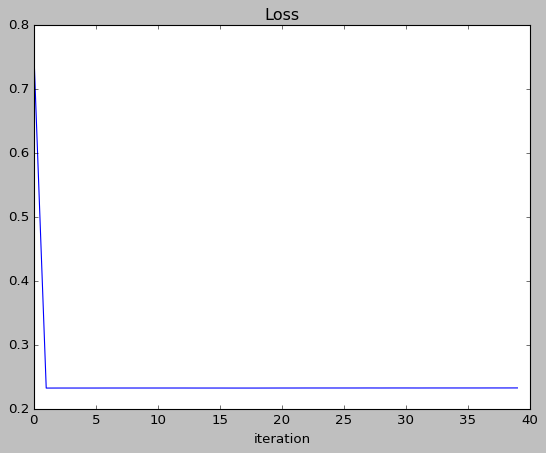

In [214]:
loss_visual(acc_list)